<a href="https://colab.research.google.com/github/GDharan10/Project9_ElectricVehicleAnalysis-WA/blob/main/ElectricVehicleAnalysis_WA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Libraries**

In [39]:
import pandas as pd
import numpy as np

from shapely.wkt import loads

# **Loading the Dataset:**

In [30]:
df = pd.read_csv("/content/drive/MyDrive/Task/Electric Vehicle Dataset Analysis - WA/Electric_Vehicle_Population_Data.csv")

# **Inspecting and Cleaning the Data:**

In [31]:
df.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,WBY8P6C58K,King,Seattle,WA,98115.0,2019,BMW,I3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,153,0,43.0,259254397,POINT (-122.3008235 47.6862671),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303300e+10
1,5YJSA1DN4D,Kitsap,Bremerton,WA,98312.0,2013,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,208,69900,35.0,127420940,POINT (-122.6961203 47.5759584),PUGET SOUND ENERGY INC,5.303508e+10
2,5YJSA1E26J,King,Kent,WA,98042.0,2018,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,249,0,47.0,170287183,POINT (-122.1145138 47.3581107),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
3,WBY2Z2C54E,King,Bellevue,WA,98004.0,2014,BMW,I8,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,14,0,41.0,205545868,POINT (-122.202397 47.619252),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10
4,5YJXCDE23J,King,Bellevue,WA,98004.0,2018,TESLA,MODEL X,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,0,41.0,237977386,POINT (-122.202397 47.619252),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186879 entries, 0 to 186878
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         186879 non-null  object 
 1   County                                             186876 non-null  object 
 2   City                                               186876 non-null  object 
 3   State                                              186879 non-null  object 
 4   Postal Code                                        186876 non-null  float64
 5   Model Year                                         186879 non-null  int64  
 6   Make                                               186879 non-null  object 
 7   Model                                              186879 non-null  object 
 8   Electric Vehicle Type                              186879 non-null  object

In [33]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Postal Code,186876.0,9.817750e+04,2.374643e+03,1.731000e+03,9.805200e+04,9.812200e+04,9.837100e+04,9.957700e+04
Model Year,186879.0,2.020660e+03,2.991398e+00,1.997000e+03,2.019000e+03,2.022000e+03,2.023000e+03,2.024000e+03
Electric Range,186879.0,5.670779e+01,9.078881e+01,0.000000e+00,0.000000e+00,0.000000e+00,7.300000e+01,3.370000e+02
Base MSRP,186879.0,1.011918e+03,8.115768e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,8.450000e+05
Legislative District,186476.0,2.906901e+01,1.490097e+01,1.000000e+00,1.800000e+01,3.300000e+01,4.200000e+01,4.900000e+01
DOL Vehicle ID,186879.0,2.225627e+08,7.463672e+07,4.385000e+03,1.850864e+08,2.302081e+08,2.577993e+08,4.792548e+08
2020 Census Tract,186876.0,5.297773e+10,1.570887e+09,1.001020e+09,5.303301e+10,5.303303e+10,5.305307e+10,5.603300e+10


In [38]:
df.describe(include=['object']).T

,count,unique,top,freq
VIN (1-10),186471,11237,7SAYGDEE6P,1236
County,186471,39,King,97012
City,186471,473,Seattle,30873
State,186471,1,WA,186471
Make,186471,40,TESLA,83149
Model,186471,143,MODEL Y,38577
Electric Vehicle Type,186471,2,Battery Electric Vehicle (BEV),146021
Clean Alternative Fuel Vehicle (CAFV) Eligibility,186471,3,Eligibility unknown as battery range has not b...,98598
Vehicle Location,186471,547,POINT (-122.1207376 47.6705374),4753
Electric Utility,186471,75,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),69049


In [20]:
for column in df.columns:
  print(column,'---',df[column].unique())
  print('---------------------------')

VIN (1-10) --- ['WBY8P6C58K' '5YJSA1DN4D' '5YJSA1E26J' ... 'WA1E2BFY8N' '1G6RM1E42E'
 'WBA7J2C36H']
---------------------------
County --- ['King' 'Kitsap' 'Yakima' 'Thurston' 'Snohomish' 'Island' 'Chelan'
 'Skagit' 'Cowlitz' 'Whitman' 'Douglas' 'San Juan' 'Whatcom' 'Spokane'
 'Walla Walla' 'Pierce' 'Grant' 'Stevens' 'Kittitas' 'Clark' 'Okanogan'
 'Ferry' 'Jefferson' 'Klickitat' 'Clallam' 'Grays Harbor' 'Benton' 'Lewis'
 'Skamania' 'Franklin' 'Mason' 'Asotin' 'Wahkiakum' 'Pacific' 'Columbia'
 'Adams' 'Lincoln' 'Pend Oreille' 'Garfield']
---------------------------
City --- ['Seattle' 'Bremerton' 'Kent' 'Bellevue' 'Bothell' 'Sammamish' 'Yakima'
 'Bainbridge Island' 'Redmond' 'Poulsbo' 'Kirkland' 'Rainier'
 'Lake Stevens' 'Snohomish' 'Selah' 'Lynnwood' 'Coupeville' 'Burien'
 'Renton' 'Issaquah' 'Everett' 'Mukilteo' 'Kingston' 'Silverdale'
 'Olympia' 'Yelm' 'Port Orchard' 'Rochester' 'Monroe' 'Tukwila'
 'Mill Creek' 'Auburn' 'Oak Harbor' 'Wenatchee' 'Union Gap'
 'Mercer Island' 'Gig Harbo

In [6]:
df.isnull().sum()

VIN (1-10)                                             0
County                                                 3
City                                                   3
State                                                  0
Postal Code                                            3
Model Year                                             0
Make                                                   0
Model                                                  0
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Base MSRP                                              0
Legislative District                                 403
DOL Vehicle ID                                         0
Vehicle Location                                       8
Electric Utility                                       3
2020 Census Tract                                      3
dtype: int64

In [37]:
df.dropna(inplace=True)

In [19]:
df.shape

(186471, 17)

In [16]:
df.duplicated().sum()

0

In [ ]:
# Parse the 'Vehicle Location' WKT format to extract coordinates
df['Vehicle Location'] = df['Vehicle Location'].apply(lambda loc: loads(loc))

# Extract latitude and longitude from Vehicle Location
df['Latitude'] = df['geometry'].apply(lambda geom: geom.y)
df['Longitude'] = df['geometry'].apply(lambda geom: geom.x)

# **1. Geographic Distribution Analysis:**

# **2. Temporal Analysis**

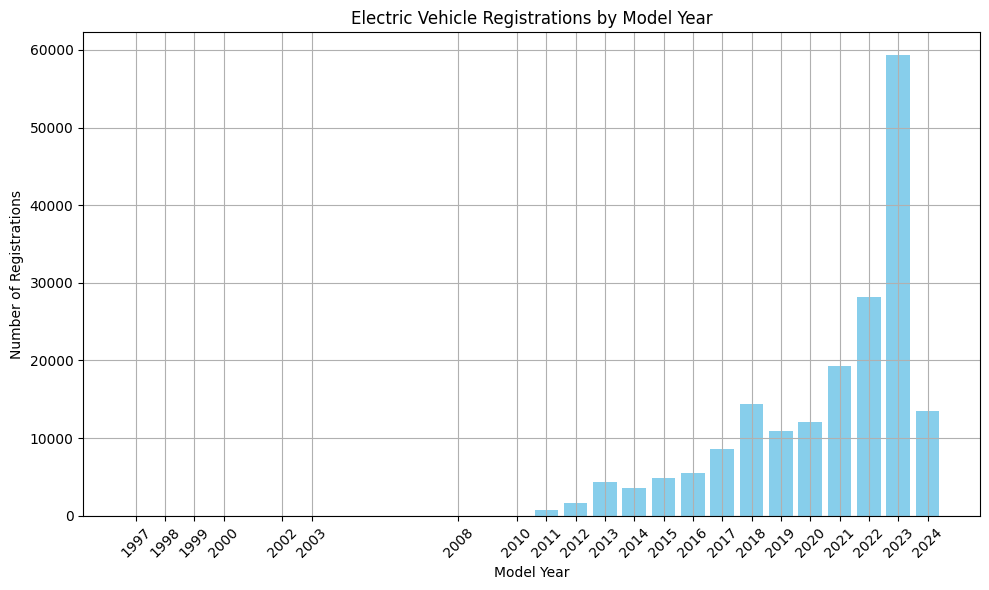

Total Registrations: 186879
Earliest Registration Year: 1997
Latest Registration Year: 2024


In [46]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your dataset is loaded into a DataFrame called 'df'
# Replace 'df' with your actual DataFrame variable name

# Sample data preparation (assuming 'Model Year' column exists)
data = df[['Model Year']]

# Clean the data: Drop rows with missing Model Year values (if any)
data = data.dropna(subset=['Model Year'])

# Analysis: Plot registrations by model year
registrations_by_year = data['Model Year'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
plt.bar(registrations_by_year.index, registrations_by_year.values, color='skyblue')
plt.xlabel('Model Year')
plt.ylabel('Number of Registrations')
plt.title('Electric Vehicle Registrations by Model Year')
plt.grid(True)
plt.xticks(registrations_by_year.index, rotation=45)
plt.tight_layout()
plt.show()

# Calculate basic statistics
total_registrations = registrations_by_year.sum()
earliest_year = registrations_by_year.index.min()
latest_year = registrations_by_year.index.max()

print(f"Total Registrations: {total_registrations}")
print(f"Earliest Registration Year: {earliest_year}")
print(f"Latest Registration Year: {latest_year}")


# **3. Vehicle Characteristics Analysis**

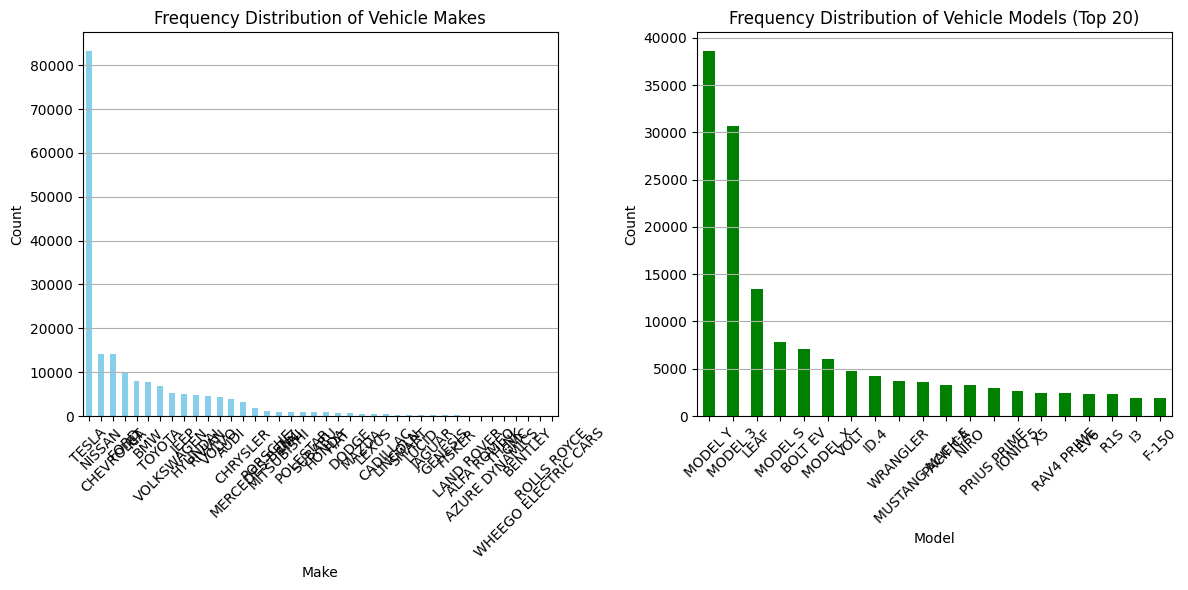

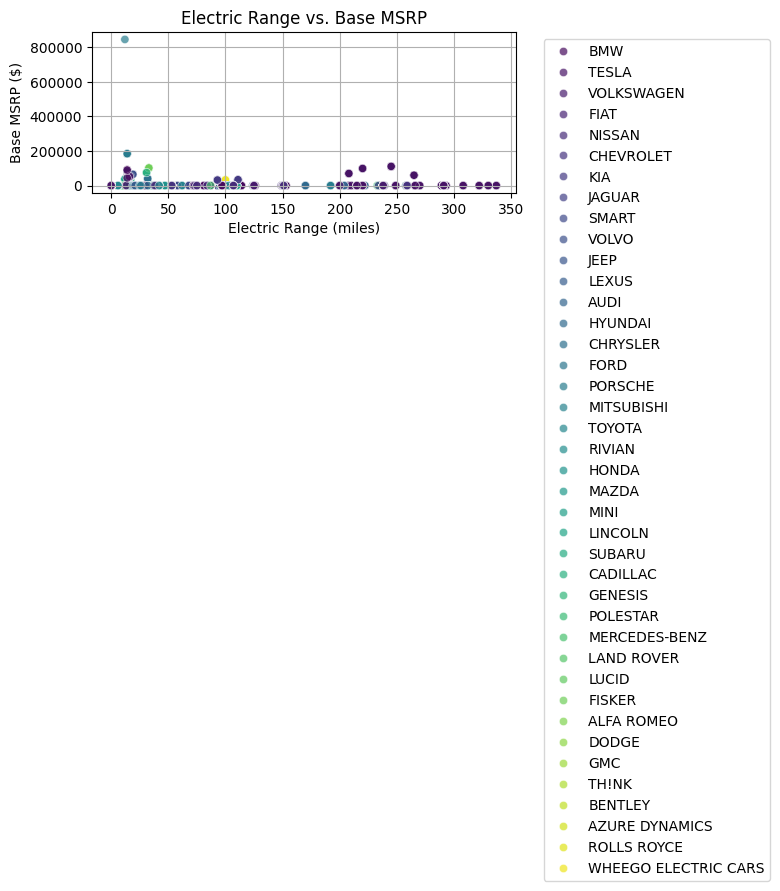

Percentage of CAFV Eligible Vehicles: 17.50%


In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your dataset is loaded into a DataFrame called 'df'
# Replace 'df' with your actual DataFrame variable name

# Sample data preparation (assuming relevant columns exist)
data = df[['Make', 'Model', 'Electric Range', 'Base MSRP', 'Clean Alternative Fuel Vehicle (CAFV) Eligibility']]

# Clean the data: Drop rows with missing values in essential columns
data = data.dropna(subset=['Make', 'Model', 'Electric Range', 'Base MSRP'])

# Analysis: Calculate frequency distributions of makes and models
make_counts = data['Make'].value_counts()
model_counts = data['Model'].value_counts()

# Visualize frequency distributions
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
make_counts.plot(kind='bar', color='skyblue')
plt.title('Frequency Distribution of Vehicle Makes')
plt.xlabel('Make')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y')

plt.subplot(1, 2, 2)
model_counts.head(20).plot(kind='bar', color='green')
plt.title('Frequency Distribution of Vehicle Models (Top 20)')
plt.xlabel('Model')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y')

plt.tight_layout()
plt.show()

# Visualize electric range vs. base MSRP
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Electric Range', y='Base MSRP', data=data, hue='Make', palette='viridis', alpha=0.7)
plt.title('Electric Range vs. Base MSRP')
plt.xlabel('Electric Range (miles)')
plt.ylabel('Base MSRP ($)')
plt.grid(True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Assess CAFV eligibility based on electric range criteria
# Example: Assume CAFV eligible if electric range >= 200 miles
caf_eligible = data[data['Electric Range'] >= 200]

# Calculate percentage of CAFV eligible vehicles
caf_eligible_percentage = (len(caf_eligible) / len(data)) * 100
print(f"Percentage of CAFV Eligible Vehicles: {caf_eligible_percentage:.2f}%")


# **4. Legislative District Analysis**

<ipython-input-50-f530fe5e7c71>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(subset=['Legislative District'], inplace=True)
<ipython-input-50-f530fe5e7c71>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Legislative District'] = data['Legislative District'].astype(int)
<ipython-input-50-f530fe5e7c71>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ev_counts_per_district.index, y=ev_coun

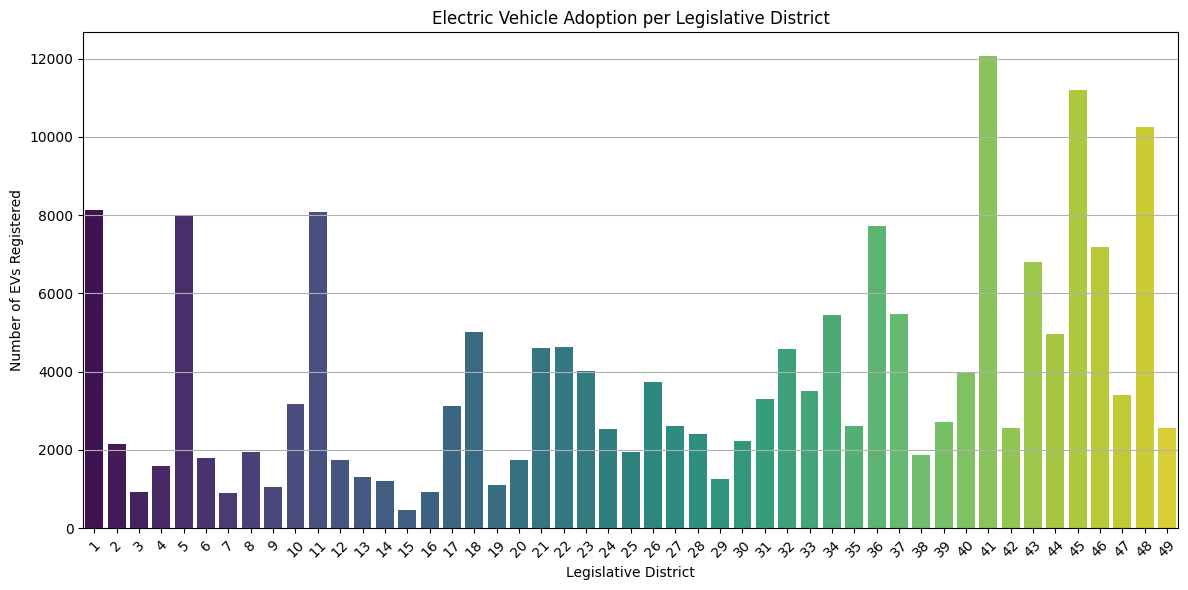

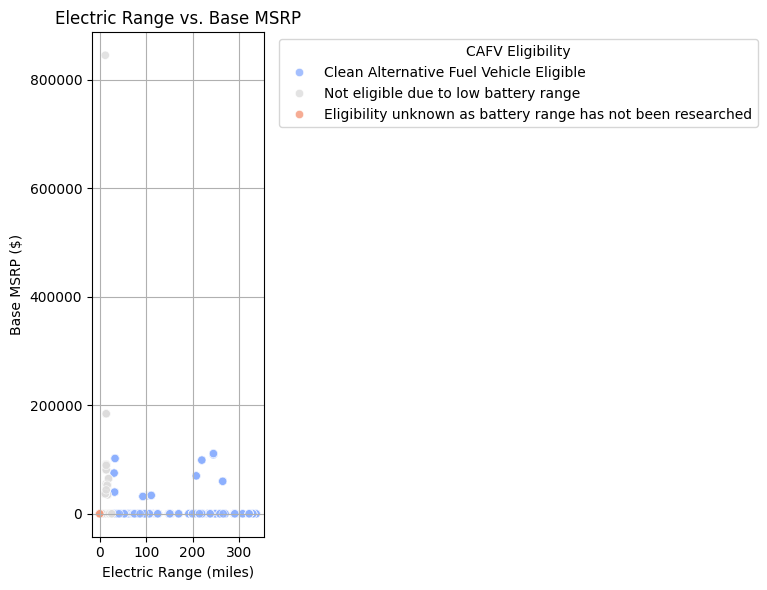

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset (replace 'file_path.csv' with your actual file path)
df = pd.read_csv('/content/drive/MyDrive/Task/Electric Vehicle Dataset Analysis - WA/Electric_Vehicle_Population_Data.csv')

# Select relevant columns for analysis
data = df[['Legislative District', 'Electric Vehicle Type', 'Electric Range', 'Base MSRP', 'Clean Alternative Fuel Vehicle (CAFV) Eligibility']]

# Clean data: Handle missing values if any
data.dropna(subset=['Legislative District'], inplace=True)

# Convert Legislative District to integer type (if not already)
data['Legislative District'] = data['Legislative District'].astype(int)

# Analysis: Calculate EV adoption rates per legislative district
ev_counts_per_district = data['Legislative District'].value_counts().sort_index()

# Visualize adoption rates across districts
plt.figure(figsize=(12, 6))
sns.barplot(x=ev_counts_per_district.index, y=ev_counts_per_district.values, palette='viridis')
plt.title('Electric Vehicle Adoption per Legislative District')
plt.xlabel('Legislative District')
plt.ylabel('Number of EVs Registered')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Explore correlations with policy data and socioeconomic factors
# Example: Scatter plot of Electric Range vs. Base MSRP
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Electric Range', y='Base MSRP', data=data, hue='Clean Alternative Fuel Vehicle (CAFV) Eligibility', palette='coolwarm', alpha=0.8)
plt.title('Electric Range vs. Base MSRP')
plt.xlabel('Electric Range (miles)')
plt.ylabel('Base MSRP ($)')
plt.legend(title='CAFV Eligibility', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

# Further analysis as per your specific data and hypotheses


# **5. Electric Range and Base MSRP Correlation**

<ipython-input-51-3b4ce67f88e4>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)


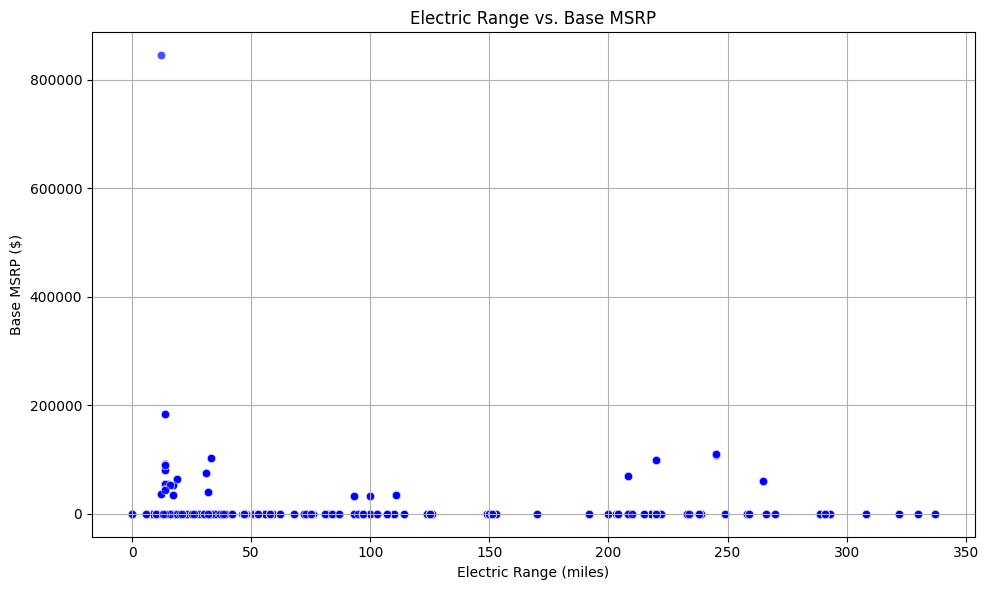

Pearson correlation coefficient between Electric Range and Base MSRP: 0.11
Outliers with high range and low cost:
        Electric Range  Base MSRP
6                  322          0
25                 322          0
40                 266          0
62                 289          0
70                 308          0
...                ...        ...
186778             259          0
186780             259          0
186799             322          0
186839             291          0
186864             266          0

[9505 rows x 2 columns]


In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = '/content/drive/MyDrive/Task/Electric Vehicle Dataset Analysis - WA/Electric_Vehicle_Population_Data.csv'
df = pd.read_csv(file_path)

# Select relevant columns for analysis
data = df[['Electric Range', 'Base MSRP']]

# Clean data: Drop any rows with missing values in Electric Range or Base MSRP
data.dropna(inplace=True)

# Plot electric range vs. base MSRP
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Electric Range', y='Base MSRP', data=data, alpha=0.7, color='blue')
plt.title('Electric Range vs. Base MSRP')
plt.xlabel('Electric Range (miles)')
plt.ylabel('Base MSRP ($)')
plt.grid(True)
plt.tight_layout()
plt.show()

# Conduct correlation analysis
correlation = data['Electric Range'].corr(data['Base MSRP'])
print(f"Pearson correlation coefficient between Electric Range and Base MSRP: {correlation:.2f}")

# Additional analysis or insights
# Identify outliers or clusters in the data
# Example: Identify EVs with high range and low cost for further investigation
outliers = data[(data['Electric Range'] > 250) & (data['Base MSRP'] < 40000)]
print("Outliers with high range and low cost:")
print(outliers)

# Further insights or recommendations based on the analysis



# **6. Electric Utility Service Analysis:**

<ipython-input-52-26d7f8b0bd04>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(subset=['Electric Utility'], inplace=True)
<ipython-input-52-26d7f8b0bd04>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ev_counts.index, y=ev_counts.values, palette='viridis')
<ipython-input-52-26d7f8b0bd04>:25: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


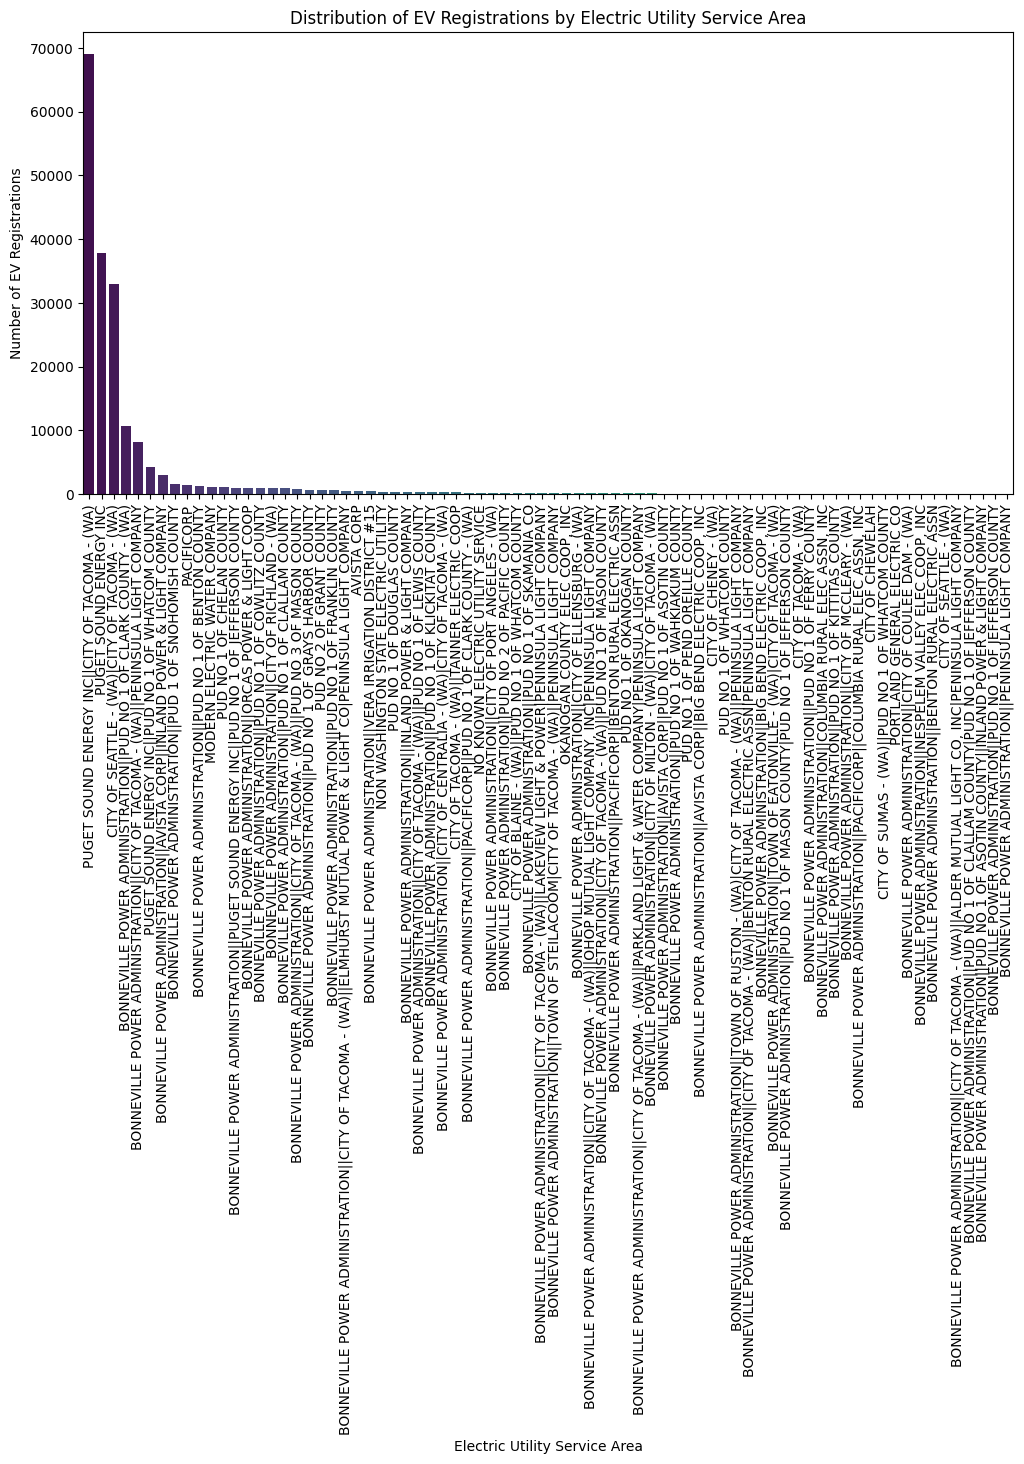

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = '/content/drive/MyDrive/Task/Electric Vehicle Dataset Analysis - WA/Electric_Vehicle_Population_Data.csv'
df = pd.read_csv(file_path)

# Select relevant columns for analysis
data = df[['Electric Utility']]

# Clean data: Drop any rows with missing values in Electric Utility
data.dropna(subset=['Electric Utility'], inplace=True)

# Count EV registrations per electric utility service area
ev_counts = data['Electric Utility'].value_counts()

# Plot distribution of EV registrations by electric utility service area
plt.figure(figsize=(12, 6))
sns.barplot(x=ev_counts.index, y=ev_counts.values, palette='viridis')
plt.title('Distribution of EV Registrations by Electric Utility Service Area')
plt.xlabel('Electric Utility Service Area')
plt.ylabel('Number of EV Registrations')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Calculate adoption rates per electric utility service
